# Homework 4

Write programs which do binary morphology on a binary image:
(a) Dilation
(b) Erosion
(c) Opening
(d) Closing
(e) Hit-and-miss transform

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
h, w = img.shape[0], img.shape[1]

In [2]:
#set kernel
ker = np.zeros([21, 2], dtype='int8')
#octogonal 3-5-5-5-3 kernel
ker[0] = [-2, -1]
ker[1] = [-2, 0]
ker[2] = [-2, 1]
ker[3] = [-1, -2]
ker[4] = [-1, -1]
ker[5] = [-1, 0]
ker[6] = [-1, 1]
ker[7] = [-1, 2]
ker[8] = [0, -2]
ker[9] = [0, -1]
ker[10] = [0, 0]
ker[11] = [0, 1]
ker[12] = [0, 2]
ker[13] = [1, -2]
ker[14] = [1, -1]
ker[15] = [1, 0]
ker[16] = [1, 1]
ker[17] = [1, 2]
ker[18] = [2, -1]
ker[19] = [2, 0]
ker[20] = [2, 1]
#"L" shaped kernel
ker_j = np.zeros([3, 2], dtype='int8')
ker_k = np.zeros([3, 2], dtype='int8')
ker_j[0] = [0, 0]
ker_j[1] = [0, -1]
ker_j[2] = [1, 0]
ker_k[0] = [-1, 0]
ker_k[1] = [-1, 1]
ker_k[2] = [0, 1]

In [3]:
#generate a binary image (threshold at 128)
def Binarize():
    new_img = np.zeros([h, w], dtype=img.dtype)
    for i in range(h):
        for j in range(w):
            if img[i][j] < 128:
                new_img[i][j] = 0
            else:
                new_img[i][j] = 255
    return new_img

In [4]:
#binary dilation
def Dilation(img):
    new_img = np.zeros([h, w], dtype=img.dtype)
    for i in range(h):
        for j in range(w):
            if (img[i][j] == 255):
                for k in range(21):
                    x, y = i + ker[k][0], j + ker[k][1]
                    if (x >= 0 and x < h and y >= 0 and y < w):
                        new_img[x][y] = 255
    return new_img

In [5]:
#binary erosion
def Erosion(img, ker, ker_size):
    new_img = np.zeros([h, w], dtype=img.dtype)
    for i in range(h):
        for j in range(w):
            remove = 0
            for k in range(ker_size):
                x, y = i + ker[k][0], j + ker[k][1]
                if (x < 0 or x >= h or y < 0 or y >= w or img[x][y] != 255):
                    remove = 1
            if (remove != 1):
                new_img[i][j] = 255
    return new_img

In [6]:
#binary opening
def Opening(img):
    new_img = np.zeros([h, w], dtype=img.dtype)
    new_img = img
    return Dilation(Erosion(new_img, ker, 21))

In [7]:
#binary closing
def Closing(img):
    new_img = np.zeros([h, w], dtype=img.dtype)
    new_img = img
    return Erosion(Dilation(new_img), ker, 21)

In [8]:
#顯示影像
def show_result(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [9]:
#binary hit-and-miss transform
def HitAndMiss(img):
    comp_img = np.zeros([h, w], dtype=img.dtype)
    new_img = np.zeros([h, w], dtype=img.dtype)
    tmp1_img = np.zeros([h, w], dtype=img.dtype)
    tmp2_img = np.zeros([h, w], dtype=img.dtype)
    for i in range(h):
        for j in range(w):
            comp_img[i][j] = 255 - img[i][j]

    tmp1_img = Erosion(img, ker_j, 3)
    tmp2_img = Erosion(comp_img, ker_k, 3)
    
    for i in range(h):
        for j in range(w):
            if (tmp1_img[i][j] == 255 and tmp2_img[i][j] == 255):
                new_img[i][j] = 255
    return new_img

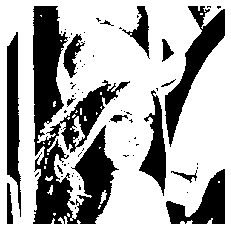

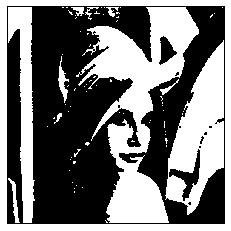

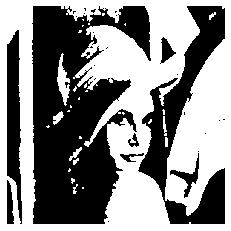

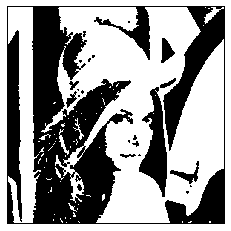

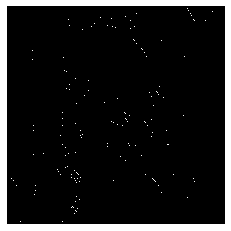

In [10]:
binary_img = Binarize()
show_result(Dilation(binary_img))
show_result(Erosion(binary_img, ker, 21))
show_result(Opening(binary_img))
show_result(Closing(binary_img))
show_result(HitAndMiss(binary_img))